# Trabalho 3

## Introdução

## Bibliotecas

In [6]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

## Dataset

In [7]:
file = "train-00000-of-00001-ecf072e7202447d8.parquet"
df = pd.read_parquet(file, engine= 'pyarrow')

In [8]:
len(df)

3877

In [9]:
df.head(4)

,titulo,texto,link,resumo,categoria,data_hora
0,"Veja a trajetória de Fernando Diniz, em busca ...",Se tem um treinador que sempre foi badalado pe...,https://www.cnnbrasil.com.br/esportes/veja-a-t...,Técnico tricolor e da Seleção Brasileira tem a...,esportes,2023-11-04 12:26:18
1,"Após tempestade com ventos, São Paulo terá sáb...",Após uma tempestade com ventos de mais de 100 ...,https://www.cnnbrasil.com.br/nacional/apos-tem...,"Termômetros devem chegar a 26ºC, esquentando a...",nacional,2023-11-04 12:15:44
2,Como os aplicativos de relacionamento “arruina...,Jenny Nguyen-Don estava com vontade de comer f...,https://www.cnnbrasil.com.br/tecnologia/como-o...,Pessoas em busca de relacionamentos afirmam qu...,tecnologia,2023-11-04 12:15:07
3,Fluminense pode ser o 26º clube a levantar a t...,O Fluminense vai em busca do primeiro título d...,https://www.cnnbrasil.com.br/esportes/fluminen...,"Em busca do título inédito, o Tricolor carioca...",esportes,2023-11-04 12:05:24


## Balanceamento

In [10]:
df['categoria'].value_counts()

categoria
esportes           960
nacional           623
internacional      618
economia           562
politica           507
entretenimento     450
tecnologia          44
saude               41
noticias            38
lifestyle           21
branded-content     13
Name: count, dtype: int64

<Axes: xlabel='categoria'>

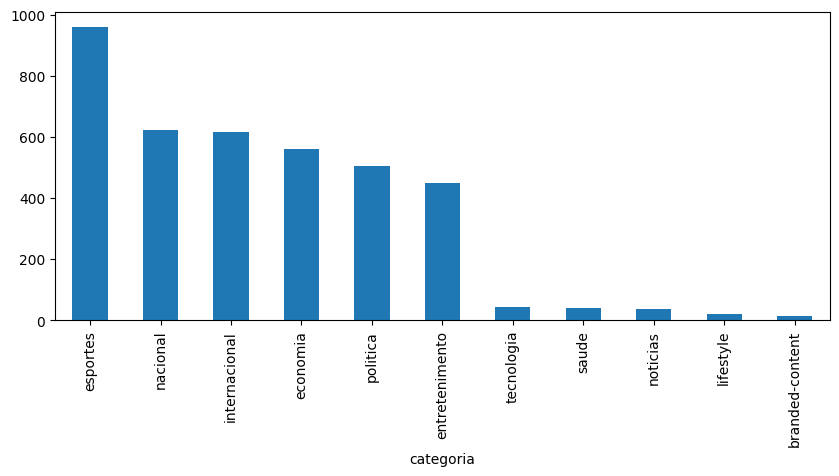

In [11]:
plt.figure(figsize=(10,4))
df.categoria.value_counts().plot(kind='bar')

In [12]:
indice_linha_remover = ['tecnologia',  'saude','noticias','lifestyle','branded-content']

In [13]:
df = df[~df['categoria'].isin(indice_linha_remover)]

In [14]:
df['categoria'].value_counts()

categoria
esportes          960
nacional          623
internacional     618
economia          562
politica          507
entretenimento    450
Name: count, dtype: int64

In [15]:
# Undersampling
min = df['categoria'].value_counts().min()

amostras = []

for i in df['categoria'].value_counts().index:
    a = df[df['categoria'] == i].sample(min, replace=False)
    amostras.append(a)

df_balanceado = pd.concat(amostras)

In [16]:
df_balanceado['categoria'].value_counts()

categoria
esportes          450
nacional          450
internacional     450
economia          450
politica          450
entretenimento    450
Name: count, dtype: int64

In [17]:
df_balanceado = df_balanceado.reset_index(drop=True)
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Endrick na Seleção: Imprensa estrangeira reper...,"A convocação do atacante Endrick, do Palmeiras...",https://www.cnnbrasil.com.br/esportes/endrick-...,Atacante de 17 anos recebeu de Fernando Diniz ...,esportes,2023-11-06 19:41:39
1,"Réu confesso em esquema de manipulação, Alef M...","O Coritiba informou, no início da tarde desta ...",https://www.cnnbrasil.com.br/esportes/reu-conf...,Atacante foi punido pela FIFA pelo envolviment...,esportes,2023-11-28 16:43:13
2,Vasco x Corinthians: tempo real e onde assisti...,Vasco e Corinthians se enfrentam às 21h30 (hor...,https://www.cnnbrasil.com.br/esportes/vasco-x-...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-28 11:11:08
3,Neymar tem alta hospitalar após cirurgia no jo...,O atacante Neymar teve alta hospitalar neste s...,https://www.cnnbrasil.com.br/esportes/neymar-t...,"Atacante foi operado na quinta-feira (2), fico...",esportes,2023-11-04 18:04:03
4,"Acusado de matar a esposa, ex-lutador pode peg...",O ex-lutador de MMA Luís Paulo dos Santos vai ...,https://www.cnnbrasil.com.br/esportes/acusado-...,"Ex-lutador de MMA, Luís Paulo dos Santos, vai ...",esportes,2023-11-21 12:54:52


In [18]:
# pega coluna
text = df_balanceado['texto'] # para NLTK
len(text)

2700

In [19]:
categorias = ['esportes','nacional', 'internacional', 'economia', 'politica', 'entretenimento']

## Pré-processamento

In [20]:
for i in range(len(text)):
    text[i] = text[i].lower()

In [21]:
from unidecode import unidecode

for i in range(len(text)):
    text[i] = unidecode(text[i])

In [22]:
for i in range(len(text)):
    text[i] = re.sub(r'[^a-zA-Z\s]', "" ,text[i])

In [23]:
token_text = []

for j in text:
    token_text.append(nltk.word_tokenize(j))

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/raissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
sw = stopwords.words('portuguese')

In [26]:
for stop in sw:
    for text in token_text:
        for t in text:
            if(t == stop):
                text.remove(t)

In [27]:
df_balanceado['texto'] = token_text
df_balanceado.head(2)

,titulo,texto,link,resumo,categoria,data_hora
0,Endrick na Seleção: Imprensa estrangeira reper...,"[convocacao, atacante, endrick, palmeiras, sel...",https://www.cnnbrasil.com.br/esportes/endrick-...,Atacante de 17 anos recebeu de Fernando Diniz ...,esportes,2023-11-06 19:41:39
1,"Réu confesso em esquema de manipulação, Alef M...","[coritiba, informou, inicio, tarde, desta, ter...",https://www.cnnbrasil.com.br/esportes/reu-conf...,Atacante foi punido pela FIFA pelo envolviment...,esportes,2023-11-28 16:43:13


## Prediction
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb  <br>
refazer para cada biblioteca

### NLTK

In [28]:
for i in range(len(token_text)):
    token_text[i] = " ".join(token_text[i])
print(token_text[0])

convocacao atacante endrick palmeiras selecao brasileira anunciada nesta segundafeira tecnico fernando diniz repercutiu imprensa estrangeira jornais espanhois evidentemente destacaram primeiro chamado jogador anos selecao principal endrick ja vendido real madrid apresentara clube proximo ano maior idade leia marca madri colocou convocacao atleta primeira pagina site endrick convocado brasil ja diario tambem capital espanhola segue perto dia dia real enfatico brasil chama endrick barcelona noticia tambem repercutiu chamadas menor destaque paginas jornais catalaes mundo deportivo publicou bomba endrick convocado selecao brasileira principal sport tambem catalunha seguiu linha semelhante bomba endrick selecao endrick convocados jogos brasil contra colombia argentina validos eliminatorias copa mundo equipe fernando diniz terceira colocacao atras argentina uruguai


In [29]:
df_balanceado['texto'] = token_text
df_balanceado.head(5)

,titulo,texto,link,resumo,categoria,data_hora
0,Endrick na Seleção: Imprensa estrangeira reper...,convocacao atacante endrick palmeiras selecao ...,https://www.cnnbrasil.com.br/esportes/endrick-...,Atacante de 17 anos recebeu de Fernando Diniz ...,esportes,2023-11-06 19:41:39
1,"Réu confesso em esquema de manipulação, Alef M...",coritiba informou inicio tarde desta tercafeir...,https://www.cnnbrasil.com.br/esportes/reu-conf...,Atacante foi punido pela FIFA pelo envolviment...,esportes,2023-11-28 16:43:13
2,Vasco x Corinthians: tempo real e onde assisti...,vasco corinthians enfrentam h horario brasilia...,https://www.cnnbrasil.com.br/esportes/vasco-x-...,Onde assistir e tempo real dos lances e das es...,esportes,2023-11-28 11:11:08
3,Neymar tem alta hospitalar após cirurgia no jo...,atacante neymar alta hospitalar neste sabado a...,https://www.cnnbrasil.com.br/esportes/neymar-t...,"Atacante foi operado na quinta-feira (2), fico...",esportes,2023-11-04 18:04:03
4,"Acusado de matar a esposa, ex-lutador pode peg...",exlutador mma luis paulo santos vai juri popul...,https://www.cnnbrasil.com.br/esportes/acusado-...,"Ex-lutador de MMA, Luís Paulo dos Santos, vai ...",esportes,2023-11-21 12:54:52


In [30]:
col = ['categoria', 'texto']
df_balanceado = df_balanceado[col]

In [31]:
df_balanceado.head()

,categoria,texto
0,esportes,convocacao atacante endrick palmeiras selecao ...
1,esportes,coritiba informou inicio tarde desta tercafeir...
2,esportes,vasco corinthians enfrentam h horario brasilia...
3,esportes,atacante neymar alta hospitalar neste sabado a...
4,esportes,exlutador mma luis paulo santos vai juri popul...


In [32]:
df_balanceado['category_id'] = df_balanceado['categoria'].factorize()[0]
from io import StringIO
category_id_df = df_balanceado[['categoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'categoria']].values)
df_balanceado.head()

,categoria,texto,category_id
0,esportes,convocacao atacante endrick palmeiras selecao ...,0
1,esportes,coritiba informou inicio tarde desta tercafeir...,0
2,esportes,vasco corinthians enfrentam h horario brasilia...,0
3,esportes,atacante neymar alta hospitalar neste sabado a...,0
4,esportes,exlutador mma luis paulo santos vai juri popul...,0


In [34]:
## Bag of Words model - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=sw)
features = tfidf.fit_transform(df_balanceado['texto']).toarray()
labels = df_balanceado.category_id
features.shape

(2700, 19905)

In [35]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for categoria, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(categoria))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'economia':
  . Most correlated unigrams:
. trimestre
. bilhoes
  . Most correlated bigrams:
. reforma tributaria
. banco central
# 'entretenimento':
  . Most correlated unigrams:
. filme
. cantora
  . Most correlated bigrams:
. post shared
. shared by
# 'esportes':
  . Most correlated unigrams:
. rodada
. campeonato
  . Most correlated bigrams:
. itatiaia versao
. originalmente itatiaia
# 'internacional':
  . Most correlated unigrams:
. gaza
. israel
  . Most correlated bigrams:
. defesa israel
. faixa gaza
# 'nacional':
  . Most correlated unigrams:
. civil
. policia
  . Most correlated bigrams:
. defesa civil
. policia civil
# 'politica':
  . Most correlated unigrams:
. supremo
. stf
  . Most correlated bigrams:
. supremo tribunal
. tribunal federal


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df_balanceado['texto'], df_balanceado['categoria'], random_state = 2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(dual=False),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [43]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.913704
LogisticRegression        0.899630
MultinomialNB             0.885556
RandomForestClassifier    0.787407
Name: accuracy, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

model = LinearSVC(dual=False)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_balanceado.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names=df_balanceado['categoria'].unique()))

                precision    recall  f1-score   support

      esportes       0.99      0.98      0.99       140
      nacional       0.84      0.86      0.85       147
 internacional       0.92      0.89      0.90       159
      economia       0.90      0.88      0.89       137
      politica       0.82      0.83      0.83       141
entretenimento       0.92      0.96      0.94       167

      accuracy                           0.90       891
     macro avg       0.90      0.90      0.90       891
  weighted avg       0.90      0.90      0.90       891

